# Visualização das análises de sensibilidade
- Notebook dedidado à leitura de arquivos .json resultantes das análises de sensibilidade para cada um dos algoritmos de otimização

In [2]:
# Importa pacotes
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def read_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

dict_pso_sens = read_json('simulations/pso_sensitivity.json')

In [3]:
dict_pso_sens[0].keys()

dict_keys(['global_factor', 'local_factor', 'v_max', 'fitness_calls', 'best_ind_list', 'avg_ind_list', 'best_solutions', 'total_time'])

In [5]:
best_ind_array = np.array(dict_pso_sens[1]['best_ind_list'])
avg_ind_array = np.array(dict_pso_sens[1]['avg_ind_list'])

indice = best_ind_array.argmax()
best_ind = best_ind_array[indice]
avg_ind = avg_ind_array[indice]
print(indice, best_ind, avg_ind)

99 0.6211521762714718 0.5897309556486903


array([0.24198929, 0.23373761, 0.27282028, 0.39862089, 0.34799187,
       0.495     , 0.499     , 0.498     , 0.466     , 0.464     ,
       0.43092915, 0.45129031, 0.473     , 0.497     , 0.31984273,
       0.3402268 , 0.363944  , 0.5       , 0.439     , 0.49797399,
       0.49831812, 0.491     , 0.5       , 0.39788049, 0.45130067,
       0.46362773, 0.5       , 0.5       , 0.48061588, 0.34160873,
       0.4843857 , 0.5       , 0.5       , 0.38859389, 0.3749489 ,
       0.37178564, 0.5       , 0.5       , 0.5       , 0.37753402,
       0.38166094, 0.46277064, 0.455     , 0.5       , 0.46149856,
       0.5       , 0.5       , 0.34235856, 0.5       , 0.49897485,
       0.49601065, 0.5       , 0.5       , 0.5       , 0.43323165,
       0.41782167, 0.49729793, 0.5       , 0.5       , 0.35589607,
       0.36860712, 0.42318915, 0.383     , 0.382     , 0.34184078,
       0.34407111, 0.384     , 0.431     , 0.5       , 0.37519604,
       0.35968033, 0.33891123, 0.451     , 0.5       , 0.43460

In [4]:
class SensVisualizer():
    def __init__(self, file_path:str, parameters:list):
        self.parameters = parameters
        with open(file_path, 'r') as file:
            self.sens_list = json.load(file)
    
    def print_keys(self):
        print(self.sens_list[0].keys())

    def process_json(self):
        processed_list = []
        for sens_dict in self.sens_list:
            dict_filtered = {}
            for parameter in self.parameters:
                dict_filtered[parameter] = sens_dict[parameter]
            if sens_dict['best_ind_list'] != 'ERRO':
                best_ind_array = np.array(sens_dict['best_ind_list'])
                avg_ind_array = np.array(sens_dict['avg_ind_list'])
                max_best_ind_value = best_ind_array.max()
                indices_of_max_best_ind = np.where(best_ind_array == max_best_ind_value)[0]

                if len(indices_of_max_best_ind) > 1:
                    # Selecionar a linha com o maior avg_ind entre as que têm o melhor best_ind
                    max_avg_ind = -np.inf
                    chosen_index = -1
                    for index in indices_of_max_best_ind:
                        if avg_ind_array[index] > max_avg_ind:
                            max_avg_ind = avg_ind_array[index]
                            chosen_index = index
                    best_ind = best_ind_array[chosen_index]
                    avg_ind = avg_ind_array[chosen_index]
                else:
                    # Caso de um único máximo
                    chosen_index = indices_of_max_best_ind[0]
                    best_ind = best_ind_array[chosen_index]
                    avg_ind = avg_ind_array[chosen_index]

                dict_filtered['best_ind'] = best_ind
                dict_filtered['avg_ind'] = avg_ind
                dict_filtered['fitness_calls'] = sens_dict['fitness_calls'][chosen_index]
                dict_filtered['total_time'] = sens_dict['total_time']

            else:
                dict_filtered['best_ind'] = 0
                dict_filtered['avg_ind'] = 0
                dict_filtered['fitness_calls'] = 0
                dict_filtered['total_time'] = 0

            processed_list.append(dict_filtered)

        self.df_sens = pd.DataFrame(processed_list)

    def get_inds(self):
        self.df_best_ind = self.df_sens.loc[self.df_sens['best_ind'] == self.df_sens['best_ind'].max()]
        self.df_avg_ind = self.df_sens.loc[self.df_sens['avg_ind'] == self.df_sens['avg_ind'].max()]
    
    def display_all(self):
        self.process_json()
        self.get_inds()
        print("Tabela de sensibilidade:")
        display(self.df_sens)

        print("Melhor indivíduo")
        display(self.df_best_ind)

        print("Melhor indivíduo médio")
        display(self.df_avg_ind)

        dict_params = {}
        for parameter in self.parameters:
            dict_params[parameter] = self.df_sens[parameter].unique()
        print("Parâmetros")
        print(dict_params)
        
path = 'simulations/cmaes_sensitivity.json'
parameters = ['mi', 'sigma']
viz = SensVisualizer(file_path=path, parameters=parameters)
viz.process_json()


# PSO

In [10]:
path = 'simulations/pso_sensitivity.json'
parameters = ['global_factor', 'local_factor', 'v_max']
viz_pso = SensVisualizer(file_path=path, parameters=parameters)
viz_pso.display_all()
df_sens_pso = viz_pso.df_sens

df_sens_pso_csv = df_sens_pso.copy(deep=True)
# Trunca até 3 casas decimais
df_sens_pso_csv['best_ind'] = df_sens_pso_csv['best_ind'].apply(lambda x: round(x, 3))
df_sens_pso_csv['avg_ind'] = df_sens_pso_csv['avg_ind'].apply(lambda x: round(x, 3))
df_sens_pso_csv['fitness_calls'] = df_sens_pso_csv['fitness_calls'].astype(int)
df_sens_pso_csv['total_time'] = df_sens_pso_csv['total_time'].apply(lambda x: round(x, 3))
df_sens_pso_csv.to_csv('processed_tables/pso_sensitivity.csv', index=False)


Tabela de sensibilidade:


,global_factor,local_factor,v_max,best_ind,avg_ind,fitness_calls,total_time
0,3.5,1.0,1.00,0.638526,0.500139,87.0,69.537304
1,3.5,1.0,3.25,0.621152,0.589731,100.0,63.303190
2,3.5,1.0,5.50,0.568837,0.244429,1.0,99.922402
3,3.5,1.0,7.75,0.568837,0.244429,1.0,100.424914
4,3.5,1.0,10.00,0.568837,0.244429,1.0,99.563831
...,...,...,...,...,...,...,...
105,6.0,6.0,1.00,0.619349,0.490645,57.0,78.819321
106,6.0,6.0,3.25,0.617325,0.527085,54.0,90.085258
107,6.0,6.0,5.50,0.625997,0.469666,100.0,83.898343
108,6.0,6.0,7.75,0.624032,0.441257,56.0,87.578920


Melhor indivíduo


,global_factor,local_factor,v_max,best_ind,avg_ind,fitness_calls,total_time
18,2.25,2.25,7.75,0.698669,0.623898,100.0,69.564799


Melhor indivíduo médio


,global_factor,local_factor,v_max,best_ind,avg_ind,fitness_calls,total_time
27,4.75,2.25,5.5,0.692197,0.682234,100.0,65.798818


Parâmetros
{'global_factor': array([3.5 , 4.75, 6.  , 2.25, 1.  ]), 'local_factor': array([1.  , 2.25, 3.5 , 4.75, 6.  ]), 'v_max': array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])}


,global_factor,local_factor,v_max,best_ind,avg_ind,fitness_calls,total_time
0,3.5,1.0,1.00,0.638526,0.500139,87.0,69.537304
1,3.5,1.0,3.25,0.621152,0.589731,100.0,63.303190
2,3.5,1.0,5.50,0.568837,0.244429,1.0,99.922402
3,3.5,1.0,7.75,0.568837,0.244429,1.0,100.424914
4,3.5,1.0,10.00,0.568837,0.244429,1.0,99.563831
...,...,...,...,...,...,...,...
105,6.0,6.0,1.00,0.619349,0.490645,57.0,78.819321
106,6.0,6.0,3.25,0.617325,0.527085,54.0,90.085258
107,6.0,6.0,5.50,0.625997,0.469666,100.0,83.898343
108,6.0,6.0,7.75,0.624032,0.441257,56.0,87.578920


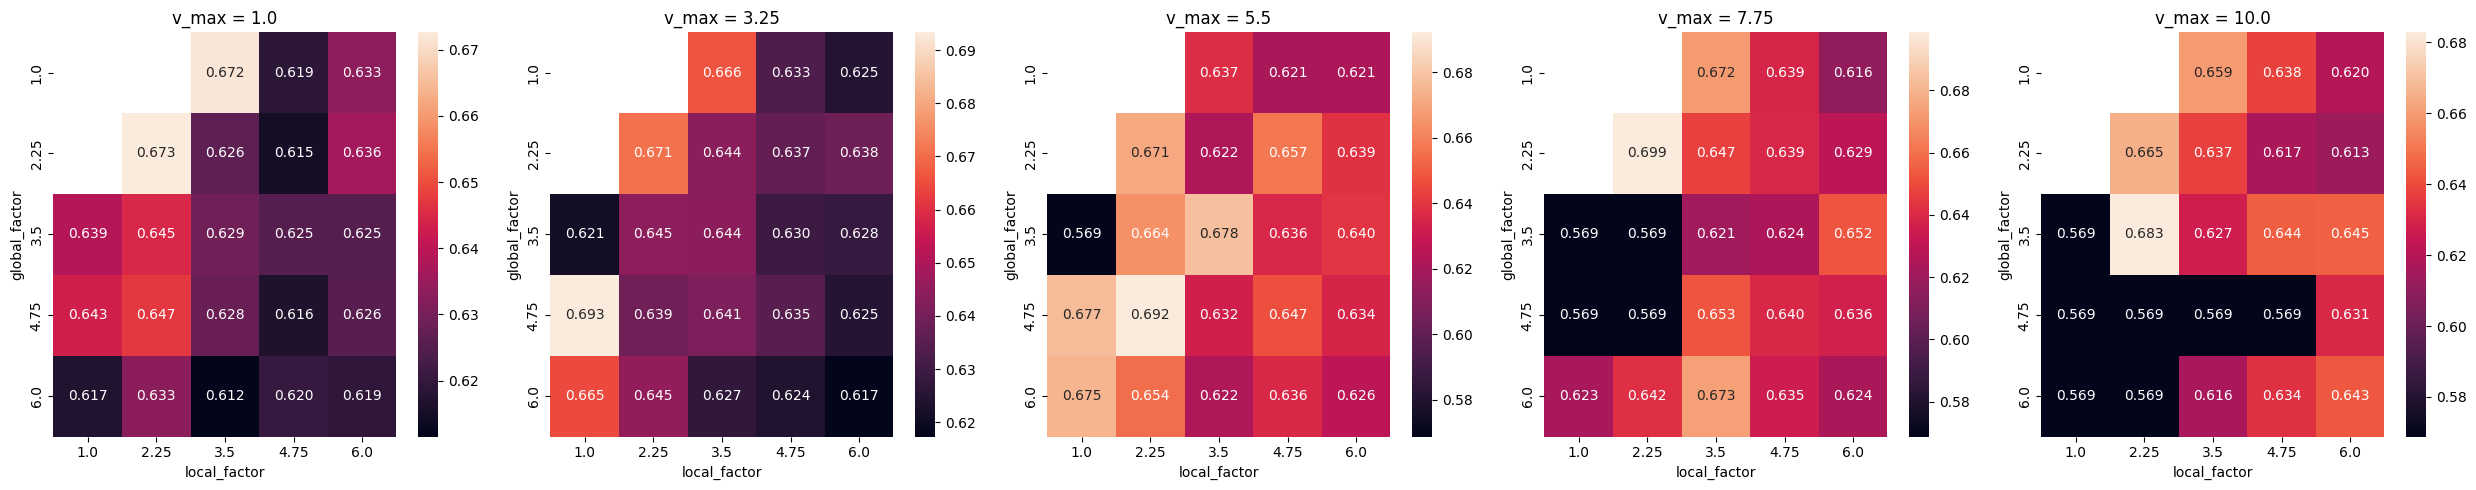

In [11]:
def plot_graph_pso(df, nom_x, nom_y, nom_z):
    list_graficos = []
    display(df)
    list_z = df[nom_z].unique()

    numero_plots = len(list_z)
    fig, axes = plt.subplots(1, numero_plots, figsize=(25, 5))  # Ajuste o tamanho conforme necessário
    iter_counter = 0
    for z in list_z:
        eixo_x = df.loc[df[nom_z] == z, nom_x]
        eixo_y = df.loc[df[nom_z] == z, nom_y]
        fitness = df.loc[df[nom_z] == z, 'best_ind']
        dict_grafico = {
            nom_x: eixo_x,
            nom_y: eixo_y,
            nom_z: z,
            'fitness': fitness
        }
        list_graficos.append(dict_grafico)

        df_filtrado = pd.DataFrame(dict_grafico)
        df_pivot = df_filtrado.pivot(values='fitness', index=nom_x, columns=[nom_y])
        sns.heatmap(data=df_pivot, ax=axes[iter_counter], annot=True, fmt=".3f")
        axes[iter_counter].set_title(f'{nom_z} = {z}')

        iter_counter += 1
    # Ajuste o espaçamento entre os subplots
    plt.tight_layout()

    # Exiba o gráfico
    plt.show()


plot_graph_pso(df_sens_pso, 'global_factor', 'local_factor', 'v_max')

,global_factor,local_factor,v_max,best_ind,avg_ind,fitness_calls,total_time
0,3.5,1.0,1.00,0.638526,0.500139,87.0,69.537304
1,3.5,1.0,3.25,0.621152,0.589731,100.0,63.303190
2,3.5,1.0,5.50,0.568837,0.244429,1.0,99.922402
3,3.5,1.0,7.75,0.568837,0.244429,1.0,100.424914
4,3.5,1.0,10.00,0.568837,0.244429,1.0,99.563831
...,...,...,...,...,...,...,...
105,6.0,6.0,1.00,0.619349,0.490645,57.0,78.819321
106,6.0,6.0,3.25,0.617325,0.527085,54.0,90.085258
107,6.0,6.0,5.50,0.625997,0.469666,100.0,83.898343
108,6.0,6.0,7.75,0.624032,0.441257,56.0,87.578920


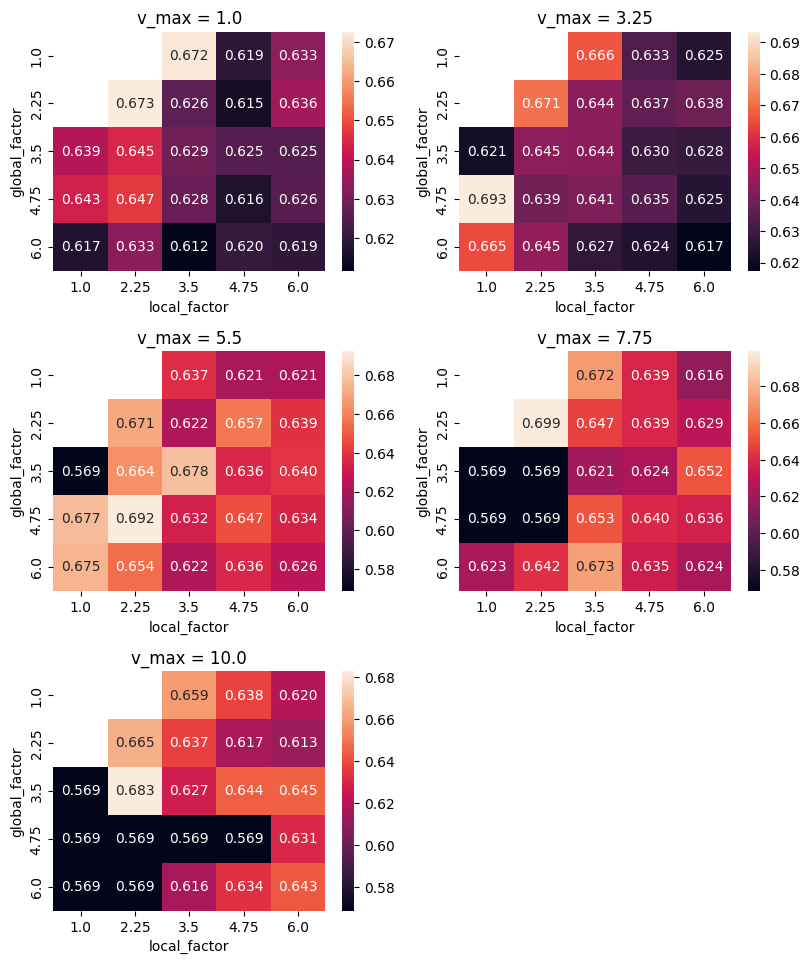

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_graph_pso(df, nom_x, nom_y, nom_z):
    list_graficos = []
    display(df)
    list_z = df[nom_z].unique()

    numero_plots = len(list_z)

    # Definindo o número de linhas e colunas
    cols = 2  # Máximo de 3 plots por linha
    rows = 3  # Duas linhas para acomodar todos os 5 plots

    # Calculando a largura e a altura da figura
    largura_figura = 21  # Largura total em cm
    altura_figura = (29.7 / rows) * (numero_plots / cols)  # Altura proporcional

    # Criando a figura com o layout ajustado
    fig, axes = plt.subplots(rows, cols, figsize=(largura_figura / 2.54, altura_figura / 2.54))

    # Preenchendo cada subplot
    for i, z in enumerate(list_z):
        row, col = divmod(i, cols)
        eixo_x = df.loc[df[nom_z] == z, nom_x]
        eixo_y = df.loc[df[nom_z] == z, nom_y]
        fitness = df.loc[df[nom_z] == z, 'best_ind']
        dict_grafico = {
            nom_x: eixo_x,
            nom_y: eixo_y,
            nom_z: z,
            'fitness': fitness
        }
        list_graficos.append(dict_grafico)

        df_filtrado = pd.DataFrame(dict_grafico)
        df_pivot = df_filtrado.pivot(values='fitness', index=nom_x, columns=[nom_y])
        sns.heatmap(data=df_pivot, ax=axes[row, col], annot=True, fmt=".3f")
        axes[row, col].set_title(f'{nom_z} = {z}')

    # Ajustando espaçamento e removendo subplots não utilizados
    for ax in axes.flat[numero_plots:]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()

# Exemplo de uso
plot_graph_pso(df_sens_pso, 'global_factor', 'local_factor', 'v_max')


- Resultados parecem ser melhores na diagonal superior de global_factor 3.5 a 1.
- Valores do topo nao existem por conta da restrição global_factor + local_factor > 2

# Evolução Diferencial

In [7]:
path = 'simulations/de_sensitivity.json'
parameters = ['mutation_rate', 'crossover_rate']
viz = SensVisualizer(file_path=path, parameters=parameters)
# ERREI NO NOME 
# global_factor = mutation_rate 
# local_factor = crossover_rate
viz.display_all()
#rename_dict = {'global_factor': 'mutation_rate', 'local_factor': 'crossover_rate'}
#viz.df_sens.rename(columns=rename_dict, inplace=True)
df_sens_de = viz.df_sens


Tabela de sensibilidade:


,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
0,0.1,0.1,0.634018,0.423581,200.0,207.241674
1,0.2,0.1,0.633987,0.474640,200.0,198.738935
2,0.3,0.1,0.620029,0.494342,200.0,193.418535
3,0.4,0.1,0.615365,0.505354,200.0,191.989191
4,0.5,0.1,0.622606,0.506917,200.0,189.424321
...,...,...,...,...,...,...
95,0.6,1.0,0.672921,0.483990,200.0,192.765502
96,0.7,1.0,0.665204,0.486946,200.0,192.420726
97,0.8,1.0,0.668480,0.491901,200.0,190.052719
98,0.9,1.0,0.646367,0.490264,200.0,189.163195


Melhor indivíduo


,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
95,0.6,1.0,0.672921,0.48399,200.0,192.765502


Melhor indivíduo médio


,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
9,1.0,0.1,0.612813,0.509475,200.0,187.310444


Parâmetros
{'mutation_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'crossover_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}


In [8]:
df_sens_de_csv = df_sens_de.copy(deep=True)
# Trunca até 3 casas decimais
df_sens_de_csv['best_ind'] = df_sens_de_csv['best_ind'].apply(lambda x: round(x, 3))
df_sens_de_csv['avg_ind'] = df_sens_de_csv['avg_ind'].apply(lambda x: round(x, 3))
df_sens_de_csv['fitness_calls'] = df_sens_de_csv['fitness_calls'].astype(int)
df_sens_de_csv['total_time'] = df_sens_de_csv['total_time'].apply(lambda x: round(x, 3))
df_sens_de_csv['crossover_rate'] = df_sens_de_csv['crossover_rate'].apply(lambda x: round(x, 1))
df_sens_de_csv['mutation_rate'] = df_sens_de_csv['mutation_rate'].apply(lambda x: round(x, 1))
df_sens_de_csv.to_csv('processed_tables/de_sensitivity.csv', index=False)



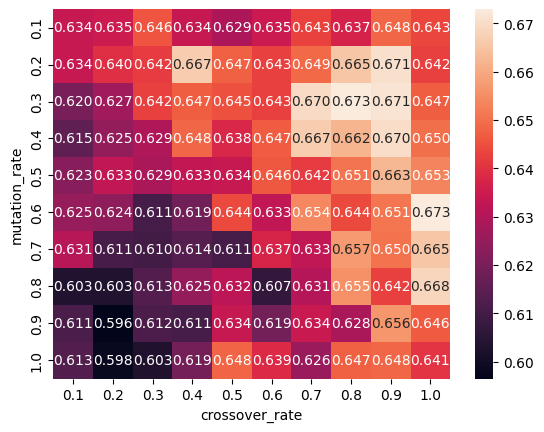

In [18]:
def plot_graph_de(df, nom_x, nom_y):

    eixo_x = np.trunc(df[nom_x] * 10) / 10.0
    eixo_y = np.trunc(df[nom_y] * 10)/ 10.0
    fitness = df['best_ind']
    dict_grafico = {
        nom_x: eixo_x,
        nom_y: eixo_y,
        'fitness': fitness
    }

    df_filtrado = pd.DataFrame(dict_grafico)
    df_pivot = df_filtrado.pivot(values='fitness', index=nom_x, columns=[nom_y])
    sns.heatmap(data=df_pivot, annot=True, fmt=".3f")


plot_graph_de(df_sens_de, 'mutation_rate', 'crossover_rate')

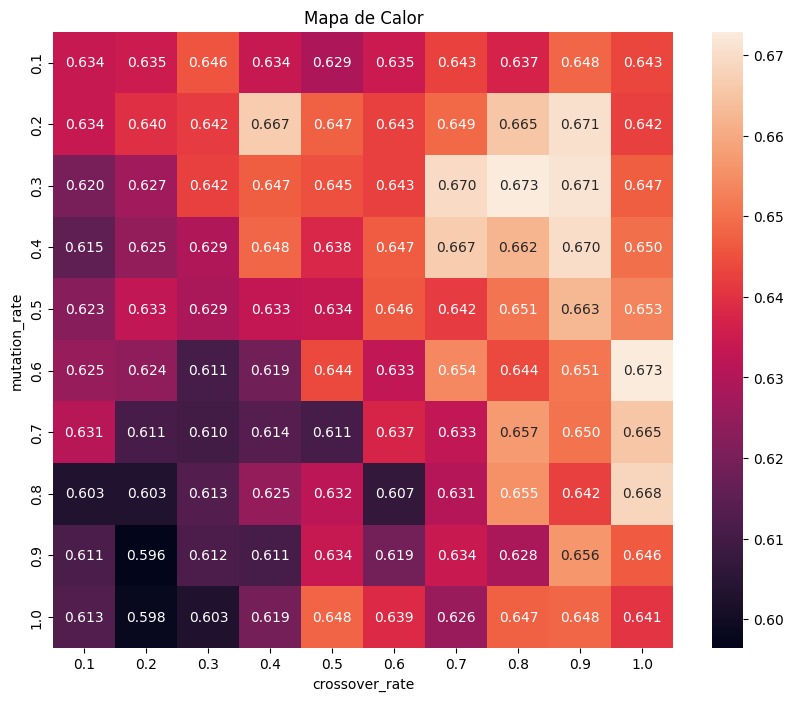

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_graph_de(df, nom_x, nom_y):

    eixo_x = np.trunc(df[nom_x] * 10) / 10.0
    eixo_y = np.trunc(df[nom_y] * 10)/ 10.0
    fitness = df['best_ind']
    dict_grafico = {
        nom_x: eixo_x,
        nom_y: eixo_y,
        'fitness': fitness
    }

    df_filtrado = pd.DataFrame(dict_grafico)
    df_pivot = df_filtrado.pivot(values='fitness', index=nom_x, columns=[nom_y])

    # Ajustar o tamanho da figura para aumentar os quadrados
    plt.figure(figsize=(10, 8))  # Ajuste os valores conforme necessário
    sns.heatmap(data=df_pivot, annot=True, fmt=".3f")

    # Ajustar outros aspectos da visualização aqui, se necessário
    plt.title("Mapa de Calor")
    plt.ylabel(nom_x)
    plt.xlabel(nom_y)

    plt.show()

# Exemplo de chamada da função (comente ou ajuste conforme seus dados)
plot_graph_de(df_sens_de, 'mutation_rate', 'crossover_rate')


- Crossover rate de melhor desempenenho é 0.9 conforme referênciia

# CMA-ES

In [16]:
path = 'simulations/cmaes_sensitivity.json'
parameters = ['mi', 'sigma']
viz = SensVisualizer(file_path=path, parameters=parameters)
viz.display_all()

Tabela de sensibilidade:


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
0,20,0,0.0,0.0,1.0,248.359646
1,60,0,0.0,0.0,1.0,255.589477
2,100,0,0.0,0.0,1.0,257.728248
3,140,0,0.0,0.0,1.0,263.616873
4,180,0,0.0,0.0,1.0,266.857745
...,...,...,...,...,...,...
95,220,0,0.0,0.0,1.0,1256.339344
96,260,0,0.0,0.0,1.0,252.333042
97,300,0,0.0,0.0,1.0,256.815790
98,340,0,0.0,0.0,1.0,1226.014655


Melhor indivíduo


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
0,20,0,0.0,0.0,1.0,248.359646
1,60,0,0.0,0.0,1.0,255.589477
2,100,0,0.0,0.0,1.0,257.728248
3,140,0,0.0,0.0,1.0,263.616873
4,180,0,0.0,0.0,1.0,266.857745
...,...,...,...,...,...,...
95,220,0,0.0,0.0,1.0,1256.339344
96,260,0,0.0,0.0,1.0,252.333042
97,300,0,0.0,0.0,1.0,256.815790
98,340,0,0.0,0.0,1.0,1226.014655


Melhor indivíduo médio


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
0,20,0,0.0,0.0,1.0,248.359646
1,60,0,0.0,0.0,1.0,255.589477
2,100,0,0.0,0.0,1.0,257.728248
3,140,0,0.0,0.0,1.0,263.616873
4,180,0,0.0,0.0,1.0,266.857745
...,...,...,...,...,...,...
95,220,0,0.0,0.0,1.0,1256.339344
96,260,0,0.0,0.0,1.0,252.333042
97,300,0,0.0,0.0,1.0,256.815790
98,340,0,0.0,0.0,1.0,1226.014655


Parâmetros
{'mi': array([ 20,  60, 100, 140, 180, 220, 260, 300, 340, 380]), 'sigma': array([0])}


# DEPSO

In [9]:
path = 'simulations/depso_sensitivity.json'
parameters = ['global_factor', 'local_factor', 'v_max', 'mutation_rate', 'crossover_rate']
viz = SensVisualizer(file_path=path, parameters=parameters)
viz.display_all()

Tabela de sensibilidade:


,global_factor,local_factor,v_max,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
0,3.05,1.05,1.0,0.20,0.2,0.684490,0.500000,191.0,127.125870
1,3.05,1.05,1.0,0.20,0.6,0.684451,0.581250,187.0,125.327503
2,3.05,1.05,1.0,0.20,1.0,0.644601,0.509065,191.0,144.698967
3,3.05,1.05,1.0,0.55,0.2,0.694663,0.495927,195.0,120.287649
4,3.05,1.05,1.0,0.55,0.6,0.678236,0.512581,191.0,124.756981
...,...,...,...,...,...,...,...,...,...
157,3.05,3.05,8.0,0.55,0.6,0.672401,0.478037,203.0,168.744677
158,3.05,3.05,8.0,0.55,1.0,0.653534,0.494287,203.0,157.292043
159,3.05,3.05,8.0,0.90,0.2,0.667922,0.519362,203.0,145.770835
160,3.05,3.05,8.0,0.90,0.6,0.652277,0.219786,199.0,171.480765


Melhor indivíduo


,global_factor,local_factor,v_max,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
130,2.05,3.05,8.0,0.55,0.6,0.704091,0.382333,203.0,189.563619


Melhor indivíduo médio


,global_factor,local_factor,v_max,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
56,3.05,2.05,1.0,0.2,1.0,0.690233,0.658045,203.0,178.86166


Parâmetros
{'global_factor': array([3.05, 2.05, 1.05]), 'local_factor': array([1.05, 2.05, 3.05]), 'v_max': array([1. , 4.5, 8. ]), 'mutation_rate': array([0.2 , 0.55, 0.9 ]), 'crossover_rate': array([0.2, 0.6, 1. ])}


# CMA-ES

In [10]:
path = 'simulations/cmaes_sensitivity.json'
parameters = ['mi', 'sigma']
viz_cames = SensVisualizer(file_path=path, parameters=parameters)
viz_cames.display_all()
df_sens_cmaes = viz.df_sens



Tabela de sensibilidade:


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
0,20,0.05,0.5,0.5,6.0,109.712896
1,60,0.05,0.5,0.5,7.0,109.484828
2,100,0.05,0.5,0.5,5.0,110.759464
3,140,0.05,0.5,0.5,6.0,109.594109
4,180,0.05,0.5,0.5,5.0,110.410311
...,...,...,...,...,...,...
95,220,0.60,0.0,0.0,0.0,0.000000
96,260,0.60,0.0,0.0,0.0,0.000000
97,300,0.60,0.0,0.0,0.0,0.000000
98,340,0.60,0.0,0.0,0.0,0.000000


Melhor indivíduo


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
0,20,0.05,0.5,0.500000,6.0,109.712896
1,60,0.05,0.5,0.500000,7.0,109.484828
2,100,0.05,0.5,0.500000,5.0,110.759464
3,140,0.05,0.5,0.500000,6.0,109.594109
4,180,0.05,0.5,0.500000,5.0,110.410311
...,...,...,...,...,...,...
61,60,0.35,0.5,0.500000,7.0,102.100091
62,100,0.35,0.5,0.500000,9.0,104.993844
63,140,0.35,0.5,0.500000,6.0,106.228697
64,180,0.35,0.5,0.262131,3.0,141.361511


Melhor indivíduo médio


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
0,20,0.05,0.5,0.5,6.0,109.712896
1,60,0.05,0.5,0.5,7.0,109.484828
2,100,0.05,0.5,0.5,5.0,110.759464
3,140,0.05,0.5,0.5,6.0,109.594109
4,180,0.05,0.5,0.5,5.0,110.410311
10,20,0.10,0.5,0.5,5.0,113.969171
11,60,0.10,0.5,0.5,5.0,112.772326
12,100,0.10,0.5,0.5,5.0,115.044628
13,140,0.10,0.5,0.5,6.0,113.127711
14,180,0.10,0.5,0.5,7.0,112.511542


Parâmetros
{'mi': array([ 20,  60, 100, 140, 180, 220, 260, 300, 340, 380]), 'sigma': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.5 , 0.55, 0.6 ])}


In [11]:
df_sens_cmaes.count()

global_factor     162
local_factor      162
v_max             162
mutation_rate     162
crossover_rate    162
best_ind          162
avg_ind           162
fitness_calls     162
total_time        162
dtype: int64

In [12]:
def plot_graph_cmaes(df, nom_x, nom_y):

    #eixo_x = np.trunc(df[nom_x] * 10) / 10.0
    #eixo_y = np.trunc(df[nom_y] * 10)/ 10.0
    fitness = df['best_ind']
    dict_grafico = {
        nom_x: df[nom_x].values,
        nom_y: df[nom_y].values,
        'fitness': fitness
    }

    df_filtrado = pd.DataFrame(dict_grafico)
    df_filtrado = df_filtrado.drop_duplicates()
    df_pivot = df_filtrado.pivot(values='fitness', index=nom_x, columns=[nom_y])
    sns.heatmap(data=df_pivot, annot=True, fmt=".3f")


plot_graph_cmaes(df_sens_cmaes, 'mi', 'sigma')

KeyError: 'mi'